## 以下模型运行及评测的 Demo

### 导入相关库

In [18]:
import torch
from inference import Inference
from config import FTConfig,Config
from model_evalue_plot import double_ellipse_draw,double_rectangle_draw,circle_draw,rec_draw,cross_draw,lack_rec_draw,ring_draw
from model_evalue import model_predict
import matplotlib
import re
import matplotlib.pyplot as plt
import numpy as np

PATTERN = r'(?<![a-zA-Z])-?\d+\.?\d*'  # 匹配浮点数的正则表达式

### 准备一些测试数据

In [19]:
import pickle as  pkl
import os
import numpy as np
import pandas as pd

data = pkl.load(open('data/test_data.pkl','rb'))

In [20]:
ellipse_data = data['ellipse']
rec_data = data['rec']
cross_data = data['cross']
lack_rec_data = data['lack_rec']
double_rec_data = data['double_rec']
double_ellipse_data = data['double_ellipse']
ring_data = data['ring']

### 导入模型

In [4]:
model_path = r"D:\codes\正式代码\transformer_for_metasurface\OpticalGPT\debug 1218\model\epoch=52-val\cer=0.20.ckpt"
config = Config()
# config.trainer_cfg = config.finetune_cfg
inference = Inference(model_path, config)

### 椭圆评估

In [5]:
ellipse_types = []
ellipse_waves = []
for _,i in ellipse_data.iterrows():
    ellipse_types.append(i["type"])
    ellipse_waves.append(i["wave"])

ellipse_preds = inference.predict(ellipse_types,ellipse_waves)


100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


In [6]:
ellipse_preds

['ellipse , the parameter : major_axis : 90 , minor_axis : 173 , phi : 156 , Px : 431 , Py : 261',
 'ellipse , the parameter : major_axis : 81 , minor_axis : 107 , phi : 0 , Px : 138 , Py : 306',
 'ellipse , the parameter : major_axis : 369 , minor_axis : 116 , phi : 0 , Px : 584 , Py : 449',
 'ellipse , the parameter : major_axis : 138 , minor_axis : 146 , phi : 0 , Px : 401 , Py : 226',
 'ellipse , the parameter : major_axis : 337 , minor_axis : 299 , phi : 0 , Px : 505 , Py : 556',
 'ellipse , the parameter : major_axis : 73 , minor_axis : 164 , phi : 83 , Px : 192 , Py : 418',
 'ellipse , the parameter : major_axis : 58 , minor_axis : 271 , phi : 0 , Px : 364 , Py : 342',
 'ellipse , the parameter : major_axis : 46 , minor_axis : 57 , phi : 0 , Px : 90 , Py : 419',
 'ellipse , the parameter : major_axis : 60 , minor_axis : 221 , phi : 104 , Px : 326 , Py : 335',
 'ellipse , the parameter : major_axis : 146 , minor_axis : 261 , phi : 112 , Px : 358 , Py : 398',
 'ellipse , the param

In [7]:
### 生成用于模拟的 csv 文件
ellipse_sim_data = []

for i in range(len(ellipse_preds)):
    paras = re.findall(PATTERN,ellipse_preds[i])
    a,b,phi,px,py = paras
    ellipse_sim_data.append([float(a),float(b),float(phi),float(px),float(py),int(i)])

ellipse_sim_data = pd.DataFrame(ellipse_sim_data,columns=["a","b","phi","px","py","index"])
ellipse_sim_data.to_csv("data/sim_data/ellipse_sim_data.csv",index=False)
    

In [23]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
ellipse_sim_data = simulation_data['ellipse']
ellipse_data = pd.concat([ellipse_data,ellipse_sim_data],axis=1)


In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 计算归一化后的损失
all_loss = 0
for i, value in ellipse_data.iterrows():
    # 获取当前行的wave和preds数据
    wave = value["wave"]
    preds = value["preds_simulation"]

    # 对每一行数据单独进行归一化
    scaler = MinMaxScaler()
    # 将数据合并为一个数组以保持相同的归一化标准
    combined_data = np.concatenate([wave.reshape(-1, 1), preds.reshape(-1, 1)], axis=0)
    normalized_data = scaler.fit_transform(combined_data)

    # 分离归一化后的数据
    n_samples = len(wave)
    normalized_wave = normalized_data[:n_samples]
    normalized_preds = normalized_data[n_samples:]

    # 计算损失
    loss = abs(normalized_wave - normalized_preds)
    all_loss += loss.sum()/len(loss)

# 计算平均损失
average_loss = all_loss/len(ellipse_data)
print(f"归一化后的平均损失: {average_loss}")

归一化后的平均损失: 0.0811208735067607


In [5]:
all_loss = 0
for i,value in ellipse_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(ellipse_data))


0.03611198730753666


In [94]:
ellipse_data

,type,structure,wave,preds_simulation,preds_simulation,preds_simulation
0,ellipse,"ellipse,the parameter: major_axis:77,minor_axi...","[0.074585, 0.07512297821735976, 0.075546953318...","[0.0662427, 0.06673660060405057, 0.06710715470...","[0.0662427, 0.06673660060405057, 0.06710715470...","[0.0662427, 0.06673660060405057, 0.06710715470..."
1,ellipse,"ellipse,the parameter: major_axis:215,minor_ax...","[0.042307, 0.04422459897370498, 0.046327393502...","[0.0326707, 0.031816123586431405, 0.0310047736...","[0.0326707, 0.031816123586431405, 0.0310047736...","[0.0326707, 0.031816123586431405, 0.0310047736..."
2,ellipse,"ellipse,the parameter: major_axis:139,minor_ax...","[0.105968, 0.10630466517404825, 0.106284228029...","[0.102755, 0.10244120689559269, 0.102414652457...","[0.102755, 0.10244120689559269, 0.102414652457...","[0.102755, 0.10244120689559269, 0.102414652457..."
3,ellipse,"ellipse,the parameter: major_axis:147,minor_ax...","[0.16877, 0.1638478386565795, 0.15431809241093...","[0.115374, 0.11121745462257049, 0.104600660786...","[0.115374, 0.11121745462257049, 0.104600660786...","[0.115374, 0.11121745462257049, 0.104600660786..."
4,ellipse,"ellipse,the parameter: major_axis:340,minor_ax...","[0.152764, 0.15355104044452542, 0.154240215191...","[0.153905, 0.15491455969771045, 0.155484610514...","[0.153905, 0.15491455969771045, 0.155484610514...","[0.153905, 0.15491455969771045, 0.155484610514..."
...,...,...,...,...,...,...
95,ellipse,"ellipse,the parameter: major_axis:131,minor_ax...","[0.0449321, 0.04440003904395714, 0.04389932845...","[0.0458046, 0.04510029121258882, 0.04441503857...","[0.0458046, 0.04510029121258882, 0.04441503857...","[0.0458046, 0.04510029121258882, 0.04441503857..."
96,ellipse,"ellipse,the parameter: major_axis:131,minor_ax...","[0.0861021, 0.08619118805425843, 0.08625483149...","[0.0781558, 0.07814522043903278, 0.07799881242...","[0.0781558, 0.07814522043903278, 0.07799881242...","[0.0781558, 0.07814522043903278, 0.07799881242..."
97,ellipse,"ellipse,the parameter: major_axis:188,minor_ax...","[0.074533, 0.07253231235069821, 0.071129949686...","[0.110476, 0.11271628123311361, 0.114803065465...","[0.110476, 0.11271628123311361, 0.114803065465...","[0.110476, 0.11271628123311361, 0.114803065465..."
98,ellipse,"ellipse,the parameter: major_axis:342,minor_ax...","[0.129823, 0.12980385584246643, 0.130386317485...","[0.127437, 0.12816947484044677, 0.129330634805...","[0.127437, 0.12816947484044677, 0.129330634805...","[0.127437, 0.12816947484044677, 0.129330634805..."


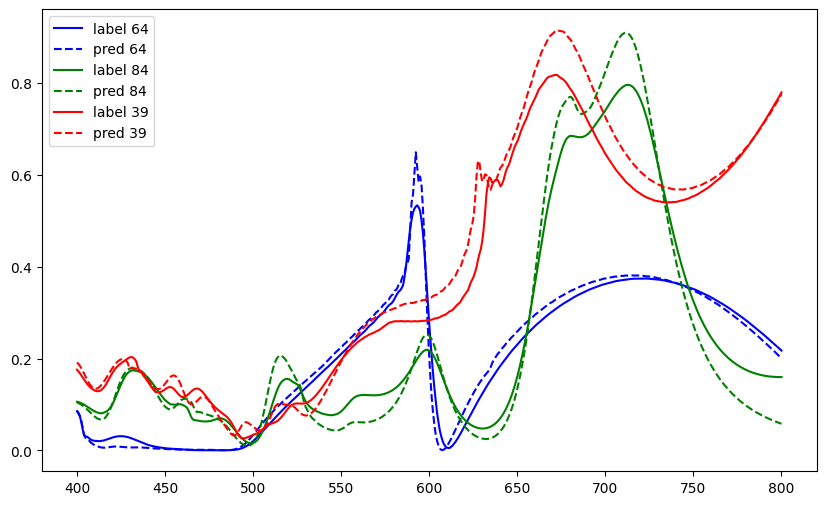

In [88]:
### 画图 
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0
# for i , d in ellipse_data.sample(3).iterrows():
#     # print(_)
#     plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i}')
#     plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i}')
#     c = c + 1
for i in [64,84,39]:
    # print(_)
    plt.plot(x, ellipse_data.iloc[i]["wave"], linestyle='-',color=colors[c], label=f'label {i}')
    plt.plot(x, ellipse_data.iloc[i]["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i}')
    c = c + 1

# 添加图例
plt.legend()

# 显示图表
plt.show()


### 矩形评估

In [8]:
rec_types = []
rec_waves = []
for _,i in rec_data.iterrows():
    rec_types.append(i["type"])
    rec_waves.append(i["wave"])

rec_preds = inference.predict(rec_types,rec_waves)


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


In [9]:
rec_preds

['rec , the parameter : W : 191 , L : 368 , phi : 136 , Px : 461 , Py : 587',
 'rec , the parameter : W : 92 , L : 315 , phi : 0 , Px : 191 , Py : 589',
 'rec , the parameter : W : 160 , L : 154 , phi : 45 , Px : 289 , Py : 396',
 'rec , the parameter : W : 56 , L : 345 , phi : 138 , Px : 495 , Py : 495',
 'rec , the parameter : W : 68 , L : 104 , phi : 0 , Px : 480 , Py : 144',
 'rec , the parameter : W : 64 , L : 142 , phi : 104 , Px : 297 , Py : 163',
 'rec , the parameter : W : 272 , L : 335 , phi : 0 , Px : 589 , Py : 402',
 'rec , the parameter : W : 304 , L : 176 , phi : 136 , Px : 494 , Py : 465',
 'rec , the parameter : W : 34 , L : 392 , phi : 0 , Px : 536 , Py : 536',
 'rec , the parameter : W : 45 , L : 139 , phi : 104 , Px : 549 , Py : 392',
 'rec , the parameter : W : 45 , L : 83 , phi : 0 , Px : 461 , Py : 414',
 'rec , the parameter : W : 34 , L : 29 , phi : 0 , Px : 433 , Py : 135',
 'rec , the parameter : W : 63 , L : 142 , phi : 136 , Px : 218 , Py : 328',
 'rec , th

In [10]:
### 生成用于模拟的 csv 文件
rec_sim_data = []

for i in range(len(rec_preds)):
    paras = re.findall(PATTERN,rec_preds[i])
    W,L,phi,px,py = paras
    rec_sim_data.append([float(L),float(W),float(phi),float(px),float(py),int(i)])

rec_sim_data = pd.DataFrame(rec_sim_data,columns=["L","W","phi","px","py","index"])
rec_sim_data.to_csv("data/sim_data/rec_sim_data.csv",index=False)

In [6]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
rec_sim_data = simulation_data['rec']
rec_data = pd.concat([rec_data,rec_sim_data],axis=1)


In [7]:
all_loss = 0
for i,value in rec_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(rec_data))

0.043637301123010654


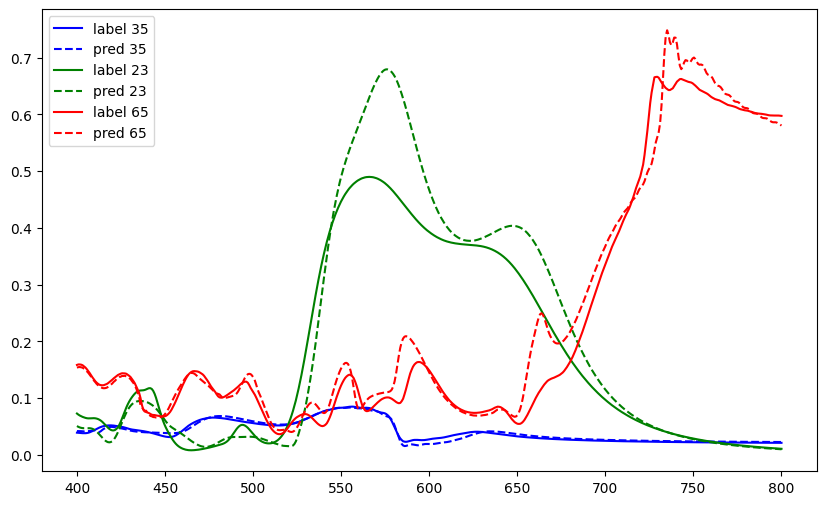

In [56]:
### 画图
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0
for i , d in rec_data.sample(3).iterrows():
    # print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i}')
    c = c + 1


# 添加图例
plt.legend()

# 显示图表
plt.show()

### 十字形评估

In [11]:
cross_types = []
cross_waves = []
for _,i in cross_data.iterrows():
    cross_types.append(i["type"])
    cross_waves.append(i["wave"])

cross_preds = inference.predict(cross_types,cross_waves)


100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


In [12]:
cross_preds

['cross , the parameter : W1 : 53 , L1 : 272 , W2 : 36 , L2 : 259 , offset : -43 , phi : 0 , Px : 619 , Py : 788',
 'cross , the parameter : W1 : 31 , L1 : 485 , W2 : 31 , L2 : 542 , offset : -175 , phi : 142 , Px : 716 , Py : 716',
 'cross , the parameter : W1 : 31 , L1 : 272 , W2 : 21 , L2 : 261 , offset : -63 , phi : 0 , Px : 570 , Py : 404',
 'cross , the parameter : W1 : 46 , L1 : 452 , W2 : 130 , L2 : 294 , offset : -77 , phi : 0 , Px : 754 , Py : 566',
 'cross , the parameter : W1 : 31 , L1 : 272 , W2 : 94 , L2 : 264 , offset : -38 , phi : 0 , Px : 651 , Py : 657',
 'cross , the parameter : W1 : 45 , L1 : 259 , W2 : 36 , L2 : 259 , offset : -62 , phi : 0 , Px : 691 , Py : 542',
 'cross , the parameter : W1 : 51 , L1 : 411 , W2 : 99 , L2 : 404 , offset : -135 , phi : 0 , Px : 756 , Py : 620',
 'cross , the parameter : W1 : 84 , L1 : 236 , W2 : 44 , L2 : 310 , offset : -12 , phi : 0 , Px : 681 , Py : 586',
 'cross , the parameter : W1 : 153 , L1 : 171 , W2 : 149 , L2 : 417 , offse

In [13]:
### 生成用于模拟的 csv 文件
cross_sim_data = []

for i in range(len(cross_preds)):
    paras = re.findall(PATTERN,cross_preds[i])
    W1,L1,W2,L2,offeset,phi,px,py = paras
    cross_sim_data.append([float(W1),float(L1),float(W2),float(L2),float(offeset),float(phi),float(px),float(py),int(i)])

cross_sim_data = pd.DataFrame(cross_sim_data,columns=["W1","L1","W2","L2","offeset","phi","px","py","index"])
cross_sim_data.to_csv("data/sim_data/cross_sim_data.csv",index=False)

In [8]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
cross_sim_data = simulation_data['cross']
cross_data = pd.concat([cross_data,cross_sim_data],axis=1)


In [9]:
all_loss = 0
for i,value in cross_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(cross_data))

0.043163316416207964


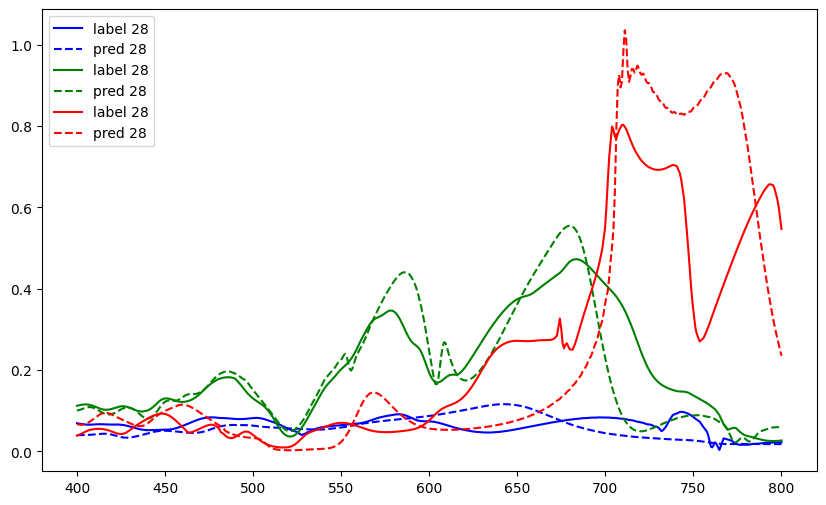

In [100]:
# 画图
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0
for _ , d in cross_data.sample(3).iterrows():
    # print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i+1}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i+1}')
    c = c + 1



# 添加图例
plt.legend()

# 显示图表

plt.show()

### 双椭圆评估

In [14]:
double_ellipse_types = []
double_ellipse_waves = []
for _,i in double_ellipse_data.iterrows():
    double_ellipse_types.append(i["type"])
    double_ellipse_waves.append(i["wave"])

double_ellipse_preds = inference.predict(double_ellipse_types,double_ellipse_waves)


100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


In [15]:
double_ellipse_preds

['double_ellipse , the parameter : major_axis : 294 , minor_axis : 112 , theta : 33 , phi : 0 , Px : 707 , Py : 705',
 'double_ellipse , the parameter : major_axis : 427 , minor_axis : 90 , theta : 43 , phi : 0 , Px : 722 , Py : 468',
 'double_ellipse , the parameter : major_axis : 324 , minor_axis : 185 , theta : 33 , phi : 0 , Px : 514 , Py : 770',
 'double_ellipse , the parameter : major_axis : 254 , minor_axis : 176 , theta : 45 , phi : 0 , Px : 540 , Py : 313',
 'double_ellipse , the parameter : major_axis : 322 , minor_axis : 95 , theta : 39 , phi : 0 , Px : 644 , Py : 387',
 'double_ellipse , the parameter : major_axis : 305 , minor_axis : 159 , theta : 21 , phi : 0 , Px : 711 , Py : 587',
 'double_ellipse , the parameter : major_axis : 305 , minor_axis : 97 , theta : 20 , phi : 0 , Px : 440 , Py : 510',
 'double_ellipse , the parameter : major_axis : 417 , minor_axis : 97 , theta : 33 , phi : 0 , Px : 604 , Py : 785',
 'double_ellipse , the parameter : major_axis : 303 , minor_

In [16]:
### 生成用于模拟的 csv 文件
double_ellipse_sim_data = []

for i in range(len(double_ellipse_preds)):
    paras = re.findall(PATTERN,double_ellipse_preds[i])
    A,B,a,phi,px,py = paras
    double_ellipse_sim_data.append([float(B),float(A),float(a),float(phi),float(px),float(py),int(i)])

double_ellipse_sim_data = pd.DataFrame(double_ellipse_sim_data,columns=["B","A","a","phi","px","py","index"])
double_ellipse_sim_data.to_csv("data/sim_data/double_ellipse_sim_data.csv",index=False)

In [21]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
double_ellipse_sim_data = simulation_data['double_ellipse']
double_ellipse_data = pd.concat([double_ellipse_data,double_ellipse_sim_data],axis=1)


In [22]:
from sklearn.preprocessing import MinMaxScaler

all_loss = 0
for i,value in double_ellipse_data.iterrows():
    wave = value["wave"]
    preds = value["preds_simulation"]

    scaler = MinMaxScaler()
    combined_data = np.concatenate([wave.reshape(-1, 1), preds.reshape(-1, 1)], axis=0)
    normalized_data = scaler.fit_transform(combined_data)

    n_samples = len(wave)
    normalized_wave = normalized_data[:n_samples]
    normalized_preds = normalized_data[n_samples:]

    loss = abs(normalized_wave - normalized_preds)
    all_loss += loss.sum()/len(loss)
print(all_loss/len(double_ellipse_data))

0.17420067845866266


In [11]:
all_loss = 0
for i,value in double_ellipse_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(double_ellipse_data))

0.08406304420344961


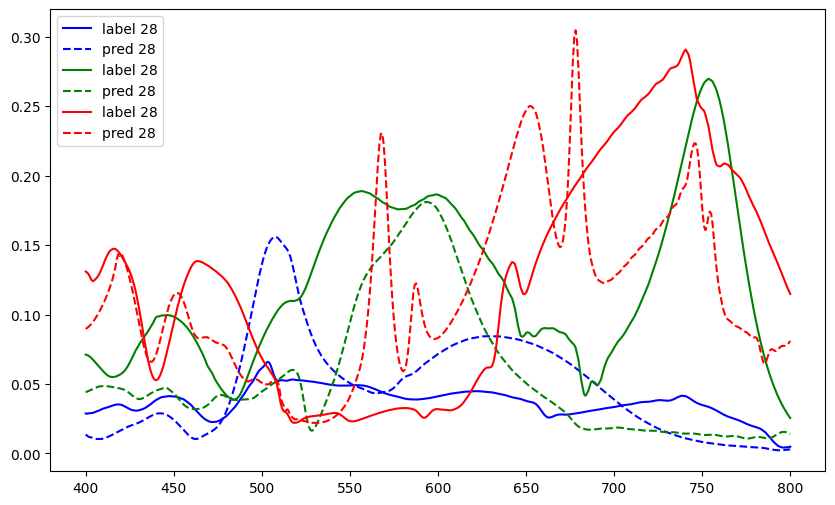

In [112]:
### 画图
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0
for _ , d in double_ellipse_data.sample(3).iterrows():
    # print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i+1}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i+1}')
    c = c + 1


# 添加图例
plt.legend()

# 显示图表
plt.show()

### 双矩形评估

In [17]:
double_rec_types = []
double_rec_waves = []
for _,i in double_rec_data.iterrows():
    double_rec_types.append(i["type"])
    double_rec_waves.append(i["wave"])

double_rec_preds = inference.predict(double_rec_types,double_rec_waves)


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


In [18]:
double_rec_preds

['double_rec , the parameter : W1 : 280 , L1 : 402 , W2 : 51 , L2 : 168 , phi : 0 , Px : 808 , Py : 805',
 'double_rec , the parameter : W1 : 54 , L1 : 140 , W2 : 183 , L2 : 132 , phi : 0 , Px : 824 , Py : 602',
 'double_rec , the parameter : W1 : 53 , L1 : 141 , W2 : 96 , L2 : 141 , phi : 0 , Px : 241 , Py : 767',
 'double_rec , the parameter : W1 : 267 , L1 : 483 , W2 : 267 , L2 : 267 , phi : 0 , Px : 715 , Py : 714',
 'double_rec , the parameter : W1 : 218 , L1 : 519 , W2 : 104 , L2 : 140 , phi : 0 , Px : 900 , Py : 640',
 'double_rec , the parameter : W1 : 138 , L1 : 232 , W2 : 139 , L2 : 232 , phi : 0 , Px : 650 , Py : 591',
 'double_rec , the parameter : W1 : 61 , L1 : 411 , W2 : 216 , L2 : 405 , phi : 0 , Px : 728 , Py : 760',
 'double_rec , the parameter : W1 : 108 , L1 : 167 , W2 : 158 , L2 : 401 , phi : 63 , Px : 810 , Py : 900',
 'double_rec , the parameter : W1 : 174 , L1 : 399 , W2 : 242 , L2 : 399 , phi : 89 , Px : 494 , Py : 886',
 'double_rec , the parameter : W1 : 60 ,

In [19]:
### 生成用于模拟的 csv 文件
double_rec_sim_data = []

for i in range(len(double_rec_preds)):
    paras = re.findall(PATTERN,double_rec_preds[i])
    W1,L1,W2,L2,phi,px,py = paras
    double_rec_sim_data.append([float(W1),float(L1),float(W2),float(L2),float(phi),float(px),float(py),int(i)])

double_rec_sim_data = pd.DataFrame(double_rec_sim_data,columns=["W1","L1","W2","L2","phi","px","py","index"])
double_rec_sim_data.to_csv("data/sim_data/double_rec_sim_data.csv",index=False)

In [12]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
double_rec_sim_data = simulation_data['double_rec']
double_rec_data = pd.concat([double_rec_data,double_rec_sim_data],axis=1)

In [13]:
all_loss = 0
for i,value in double_rec_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(double_rec_data))

0.06553792690098013


### 28 52 45  62 66 94

34
74
23


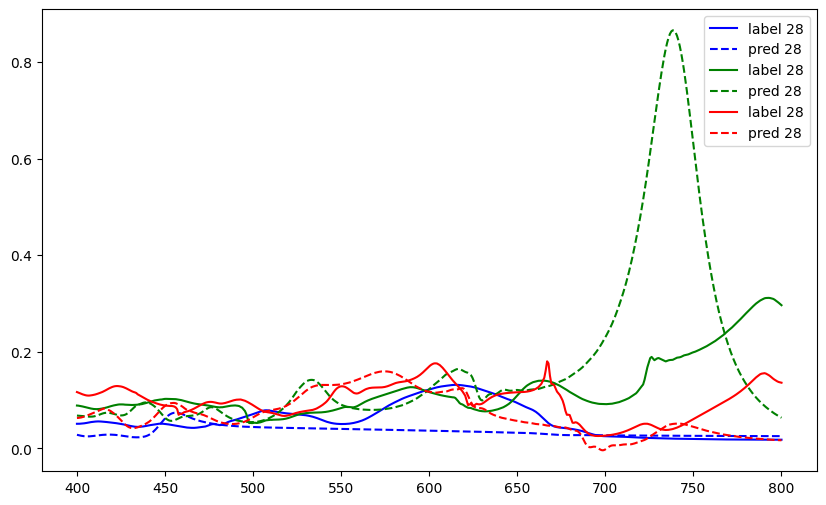

In [115]:
### 画图
x = np.linspace(400, 800, 500)

%matplotlib inline


plt.figure(figsize=(10, 6))

# 定义颜色列表

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0

for _ , d in double_rec_data.sample(3).iterrows():
    print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i+1}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i+1}')
    c = c + 1


# 添加图例
plt.legend()

# 显示图表
plt.show()

### 残缺矩形评估

In [26]:
lack_rec_types = []
lack_rec_waves = []
for _,i in lack_rec_data.iterrows():
    lack_rec_types.append(i["type"])
    lack_rec_waves.append(i["wave"])

lack_rec_preds = inference.predict(lack_rec_types,lack_rec_waves)


100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


In [27]:
lack_rec_preds

['lack_rec , the parameter : W : 177 , L : 343 , alpha : 0.035 , beta : 0.603 , gamma : 0.623 , phi : 0 , Px : 707 , Py : 707',
 'lack_rec , the parameter : W : 270 , L : 270 , alpha : 0.031 , beta : 0.924 , gamma : 0.513 , phi : 0 , Px : 480 , Py : 728',
 'lack_rec , the parameter : W : 60 , L : 104 , alpha : 0. , beta : 0.322 , gamma : 0.603 , phi : 0 , Px : 370 , Py : 558',
 'lack_rec , the parameter : W : 109 , L : 310 , alpha : 0.031 , beta : 0.811 , gamma : 0.513 , phi : 0 , Px : 437 , Py : 779',
 'lack_rec , the parameter : W : 187 , L : 605 , alpha : 0.031 , beta : 0.776 , gamma : 0.623 , phi : 83 , Px : 798 , Py : 832',
 'lack_rec , the parameter : W : 251 , L : 354 , alpha : 0.163 , beta : 0.682 , gamma : 0.471 , phi : 0 , Px : 757 , Py : 668',
 'lack_rec , the parameter : W : 112 , L : 134 , alpha : 0.031 , beta : 0.132 , gamma : 0.703 , phi : 0 , Px : 691 , Py : 869',
 'lack_rec , the parameter : W : 59 , L : 563 , alpha : 0. , beta : 0.032 , gamma : 0.513 , phi : 104 , Px 

In [31]:
### 生成用于模拟的 csv 文件
lack_rec_sim_data = []

for i in range(len(lack_rec_preds)):
    paras = re.findall(PATTERN,lack_rec_preds[i])
    if len(paras) != 8:
        continue
    W,L,alpha,beta,gamma,phi,px,py = paras
    lack_rec_sim_data.append([float(L),float(W),float(alpha),float(beta),float(gamma),float(phi),float(px),float(py),int(i)])

lack_rec_sim_data = pd.DataFrame(lack_rec_sim_data,columns=["L","W","alpha","beta","gamma","phi","px","py","index"])
lack_rec_sim_data.to_csv("data/sim_data/lack_rec_sim_data.csv",index=False)

In [14]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
lack_rec_sim_data = simulation_data['lack_rec']
lack_rec_data = pd.concat([lack_rec_data,lack_rec_sim_data],axis=1)

In [15]:
all_loss = 0
for i,value in lack_rec_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(lack_rec_data))

0.04418034712486759


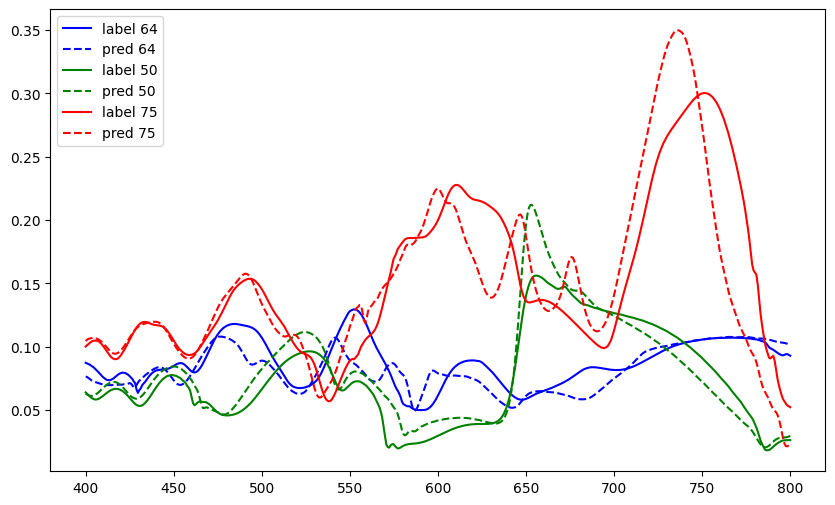

In [ ]:
### 画图
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0

for _ , d in lack_rec_data.sample(3).iterrows():
    # print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i+1}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i+1}')
    c = c + 1


# 添加图例
plt.legend()

# 显示图表
plt.show()

### 圆环评估

In [23]:
ring_types = []
ring_waves = []
for _,i in ring_data.iterrows():
    ring_types.append(i["type"])
    ring_waves.append(i["wave"])

ring_preds = inference.predict(ring_types,ring_waves)


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


In [24]:
ring_preds

['ring , the parameter : outer_diameter : 290 , inner_diameter : 99 , theta : 93 , phi : 0 , Px : 820 , Py : 825',
 'ring , the parameter : outer_diameter : 261 , inner_diameter : 99 , theta : 187 , phi : 125 , Px : 762 , Py : 884',
 'ring , the parameter : outer_diameter : 236 , inner_diameter : 153 , theta : 34 , phi : 0 , Px : 867 , Py : 871',
 'ring , the parameter : outer_diameter : 140 , inner_diameter : 1 , theta : 292 , phi : 0 , Px : 730 , Py : 395',
 'ring , the parameter : outer_diameter : 160 , inner_diameter : 122 , theta : 229 , phi : 0 , Px : 632 , Py : 483',
 'ring , the parameter : outer_diameter : 280 , inner_diameter : 199 , theta : 214 , phi : 0 , Px : 796 , Py : 795',
 'ring , the parameter : outer_diameter : 161 , inner_diameter : 1 , theta : 38 , phi : 0 , Px : 791 , Py : 492',
 'ring , the parameter : outer_diameter : 119 , inner_diameter : 13 , theta : 262 , phi : 0 , Px : 592 , Py : 696',
 'ring , the parameter : outer_diameter : 100 , inner_diameter : 84 , th

In [25]:
### 生成用于模拟的 csv 文件
ring_sim_data = []

for i in range(len(ring_preds)):
    paras = re.findall(PATTERN,ring_preds[i])
    R,r,theta,phi,px,py = paras
    ring_sim_data.append([float(R),float(r),float(theta),float(phi),float(px),float(py),int(i)])

ring_sim_data = pd.DataFrame(ring_sim_data,columns=["R","r","theta","phi","px","py","index"])
ring_sim_data.to_csv("data/sim_data/ring_sim_data.csv",index=False)



In [16]:
### 读取模拟数据
simulation_data = pkl.load(open('data/simulation_data.pkl','rb'))
ring_sim_data = simulation_data['ring']
ring_data = pd.concat([ring_data,ring_sim_data],axis=1)

In [17]:
all_loss = 0
for i,value in ring_data.iterrows():
    loss = abs(value["wave"] - value["preds_simulation"])
    all_loss += loss.sum()/len(loss)
print(all_loss/len(ring_data))

0.028897955886506933


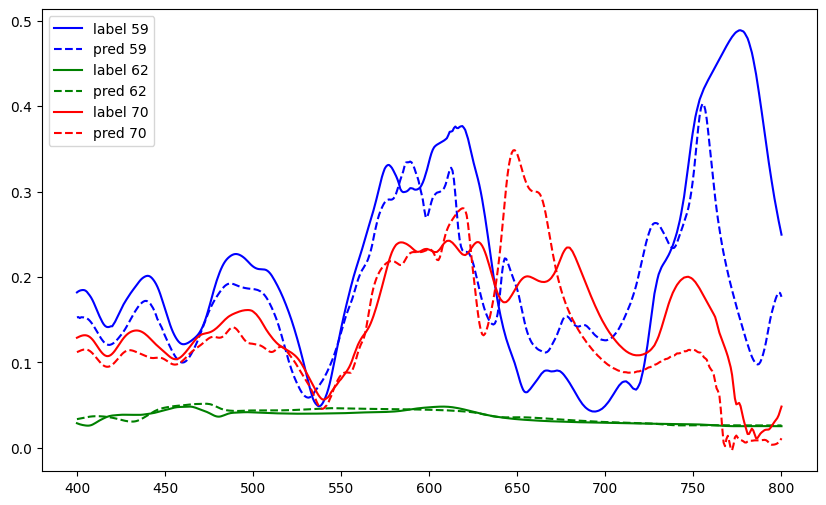

In [ ]:
### 画图
x = np.linspace(400, 800, 500)

%matplotlib inline

plt.figure(figsize=(10, 6))

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
c = 0

for _ , d in ring_data.sample(3).iterrows():
    # print(_)
    plt.plot(x, d["wave"], linestyle='-',color=colors[c], label=f'label {i+1}')
    plt.plot(x, d["preds_simulation"], color=colors[c] , linestyle='--', label=f'pred {i+1}')
    c = c + 1


# 添加图例
plt.legend()

# 显示图表
plt.show()

####   其他

In [33]:
from scipy.interpolate import interp1d
def spec_interpolator(wavelength,intensity,freq):
    wav = np.loadtxt(wavelength)
    int = np.loadtxt(intensity)
    interpolator = interp1d(wav, int, kind='cubic')
    new_wavelengths = np.linspace(400, 800, freq)
    new_intensities = interpolator(new_wavelengths)
    return new_wavelengths, new_intensities

In [34]:
ellipse_path = r"data/sim_data/ellipse_data"
rec_path = r"data/sim_data/rec_data"
cross_path = r"data/sim_data/cross_data"
double_ellipse_path = r"data/sim_data/double_ellipse_data"
double_rec_path = r"data/sim_data/double_rec_data"
lack_rec_path = r"data/sim_data/lack_rec_data"
ring_path = r"data/sim_data/ring_data"

In [35]:
light_source = r"data/sim_data/ellipse_data/lambda0.txt"
ellipse_sim = []
for i in range(100):
    file = os.path.join(ellipse_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    ellipse_sim.append(wave)


In [36]:
light_source = r"data/sim_data/rec_data/lambda0.txt"
rec_sim = []
for i in range(100):
    file = os.path.join(rec_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    rec_sim.append(wave)

In [37]:
light_source = r"data/sim_data/cross_data/lambda0.txt"
cross_sim = []
for i in range(100):
    file = os.path.join(cross_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    cross_sim.append(wave)

In [38]:
light_source = r"data/sim_data/double_ellipse_data/lambda0.txt"
double_ellipse_sim = []
for i in range(100):
    file = os.path.join(double_ellipse_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    double_ellipse_sim.append(wave)

In [39]:
light_source = r"data/sim_data/double_rec_data/lambda0.txt"
double_rec_sim = []
for i in range(100):
    file = os.path.join(double_rec_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    double_rec_sim.append(wave)

In [42]:
light_source = r"data/sim_data/lack_rec_data/lambda1.txt"
lack_rec_sim = []
for i in range(100):
    file = os.path.join(lack_rec_path,f"{i}.txt")
    if os.path.exists(file):
        source,wave = spec_interpolator(light_source, file, 500)
        lack_rec_sim.append(wave)
    else:
        lack_rec_sim.append([0]*500)

In [41]:
light_source = r"data/sim_data/ring_data/lambda0.txt"
ring_sim = []
for i in range(100):
    file = os.path.join(ring_path,f"{i}.txt")
    source,wave = spec_interpolator(light_source, file, 500)
    ring_sim.append(wave)

In [43]:
ellipse_sim_data = pd.DataFrame({"preds_simulation":ellipse_sim})
rec_sim_data = pd.DataFrame({"preds_simulation":rec_sim})
cross_sim_data = pd.DataFrame({"preds_simulation":cross_sim})
double_ellipse_sim_data = pd.DataFrame({"preds_simulation":double_ellipse_sim})
double_rec_sim_data = pd.DataFrame({"preds_simulation":double_rec_sim})
lack_rec_sim_data = pd.DataFrame({"preds_simulation":lack_rec_sim})
ring_sim_data = pd.DataFrame({"preds_simulation":ring_sim})

simulation_data = {
    "ellipse":ellipse_sim_data,
    "rec":rec_sim_data,
    "cross":cross_sim_data,
    "double_ellipse":double_ellipse_sim_data,
    "double_rec":double_rec_sim_data,
    "lack_rec":lack_rec_sim_data,
    "ring":ring_sim_data
}

# pkl.dump(simulation_data,open("data/sim_data/simulation_data.pkl","wb"))

In [44]:
pkl.dump(simulation_data,open("data/simulation_data.pkl","wb"))